# Comparative Study of Movie Ratings from IMDB and Douban
## *Mengwei Li*

# Project overview

## 1. Project Introduction

### 1.1 Background
-  Booming Chinese movie industry: In the first quarter of 2018, its box office has just overtaken North America (US and Canada combined).
-  American movie industry is trying to tap into Chinese market, but results have been mixed. Example: Black Panther vs Transformers 5: The Last Knight.

### 1.2 Research Purpose
-  Find out *__movie features__* that are predictive of *__high ratings__* and *__high box office rates__* in the Chinese market.
-  Business insight: help movie industry and entertainment providers make insightful decisions.

## 2. Data Analysis 

### 2.1 Data source
-  Ratings data for 7000 movies and TV series scraped from __[IMDB](http://www.imdb.com)__ and __[Douban](http://movie.douban.com/)__, which represent American and Chinese viewers' preferences respectively. Web scrapping was conducted using *__Requests__* package and parsed with *__Beautiful soup__*.
-  Scraped data was stored in sqlite database
-  Ratings data was processed and analyzed in *__Pandas__*.

### 2.2 Extracted features
-  Review counts from Douban and IMDB (which shows how many people have watched the movie) [below](#example)
-  Rating frequency distribution from Douban and IMDB (the average rating shows how well the movie is received by viewers)
-  Movie genre
-  Director and cast

### 2.3 Preliminary Descriptive analysis
-  Barplot showing average *__review count__* by movie genre in both websites. Results shown [below](#review_cnt).
-  Boxplot summarizing Douban's *__review rating frequency distribution__* by movie genre. Results shown [below](#review_freq).
-  Scatterplot showing the relationship between Douban and IMDB's average *__review ratings__* [below](#review_scat).


## 3. Summary Findings
-  Popular genres in common: same five genres receive high review count in IMDB and Douban.
-  High positive relationship between Douban and IMDB's average review rating.


## 4. Future Analysis Plans
-  Extract more features: (1) Director and cast popularity via facebook page visit counts; (2) Box office rates from __[Box office mojo](https://www.boxofficemojo.com)__; (3) Production budget from __[Box office mojo](https://www.boxofficemojo.com)__.
-  Build two predictive models to predict Douban review and box office rates in China respectively.
-  Use natural language processing to analyze text reviews to extract additional useful information.

## 5. Web-based app 
-  An interactive web-based app "*Viewer's bridge*" has been developed using Flask. Local version of the app has been finalized, and the next step is to deploy the app online. The following link shows the Github repository of the app which you should be able to run locally.
https://github.com/lorryon/Douban_IMDB
-  Screen shots of the main interface design of the app can be found in [Github-Main Interface](https://github.com/lorryon/Douban_IMDB/blob/master/Capture.PNG). An [interactive feature](https://github.com/lorryon/Douban_IMDB/blob/master/Capture1.PNG) is also designed to show rating by movie genre.

# Python code for producing the preliminary results

> Code for loading required packages.

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import scipy.stats as st
import matplotlib.gridspec as gridspec
%matplotlib notebook

> Code for loading and processing data.

In [3]:
# Read data from SQLITE and save data into Pandas dataframe
conn = sqlite3.connect('douban_us_movie.sqlite')
crsr = conn.cursor()
crsr.execute('SELECT DBrating,IMDBratingUS, IMDBrating, DBreview_count, IMDBreview_count, IMDBgenre, TitleEN FROM Movie WHERE DBreview_count is not NULL and IMDBreview_count is not NULL')
data = crsr.fetchall()
df_raw = pd.DataFrame(data, columns=['DBrating', 'IMDBratingUS', 'IMDBrating', 'DBreview_count', 'IMDBreview_count', 'Genre', 'Title'])

#  Data processing
## Delete rows where DBrating is blank or 0
df = df_raw.copy()
df = df[(df['DBrating']!='') & (df['DBrating']!='0')]

## remove comma from count
df['IMDBreview_count'] = df['IMDBreview_count'].str.replace(',', '')

## specify data type
df['DBrating'] = df['DBrating'].astype(float)
df['IMDBrating'] = df['IMDBrating'].astype(float)
df['DBreview_count']=df['DBreview_count'].astype(int)
df['IMDBreview_count'] = df['IMDBreview_count'].astype(int)

## create dummy variables for genre
df_genre = df['Genre'].str.replace('D/r/a/m/a/', 'Drama').str.replace('/', ' ').str.split()
genre = []
for i, j in df_genre.iteritems():
    if j is None:
        continue
    else: genre = genre + j

uniq_genre = list(set(genre))
for i in uniq_genre:
    df[i] = df_genre.apply(lambda x: i in x if x is not None else False)
    
df['All Genre'] = True

<a id="example"></a>
> Some example of movies with similar ratings that have high and low number of reviews 

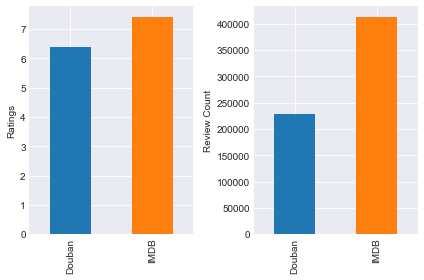

In [13]:
black_panther = pd.DataFrame({'Ratings': [6.4, 7.4], 'Review Count': [227799, 412031]}, index=['Douban', 'IMDB'])
plt.subplot(1, 2, 1)
black_panther['Ratings'].plot.bar()
plt.ylabel('Ratings')
plt.subplot(1, 2, 2)
black_panther['Review Count'].plot.bar()
plt.ylabel('Review Count')
plt.tight_layout()

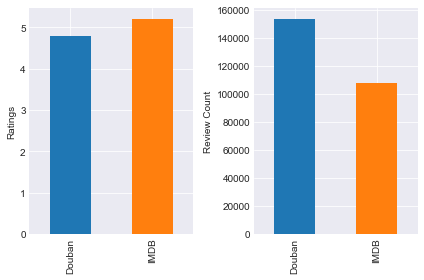

In [15]:
Transformer5 = pd.DataFrame({'Ratings': [4.8, 5.2], 'Review Count': [153477, 108208]}, index=['Douban', 'IMDB'])
plt.subplot(1, 2, 1)
Transformer5['Ratings'].plot.bar()
plt.ylabel('Ratings')
plt.subplot(1, 2, 2)
Transformer5['Review Count'].plot.bar()
plt.ylabel('Review Count')
plt.tight_layout()

<a id="review_cnt"></a>
> Code for producing average *__review count__* by movie genre in both websites.

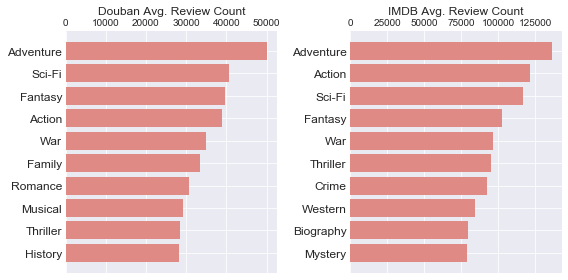

In [4]:
clr=sns.hls_palette(1, l=.7, s=.6) # color for each plot

## count average
genre_cnt_avg = np.matmul(df['DBreview_count'],df[uniq_genre])/df[uniq_genre].sum(axis=0)
genre_cnt_top10 = genre_cnt_avg.sort_values(axis=0,ascending=False).iloc[0:10].index.tolist()
genre_cnt_count_top10 = genre_cnt_avg.sort_values(axis=0,ascending=False).iloc[0:10].values.tolist()

genre_us_avg = np.matmul(df['IMDBreview_count'],df[uniq_genre])/df[uniq_genre].sum(axis=0)
genre_us_top10 = genre_us_avg.sort_values(axis=0,ascending=False).iloc[0:10].index.tolist()
genre_us_count_top10 = genre_us_avg.sort_values(axis=0,ascending=False).iloc[0:10].values.tolist()

fig = plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
fig_left = fig.add_subplot(1, 2, 1)
plt.barh(range(10), genre_cnt_count_top10, color=clr)
plt.xlabel('Douban Avg. Review Count', fontsize='large')
fig_left.axes.xaxis.set_ticks_position('top')
fig_left.axes.xaxis.set_label_position('top')
plt.yticks(range(10), genre_cnt_top10, fontsize='large')
plt.gca().invert_yaxis()

fig_right = fig.add_subplot(1, 2, 2)
plt.barh(range(10), genre_us_count_top10, color=clr)
plt.xlabel('IMDB Avg. Review Count', fontsize='large')
fig_right.axes.xaxis.set_ticks_position('top')
fig_right.axes.xaxis.set_label_position('top')
plt.yticks(range(10), genre_us_top10, fontsize='large')
plt.gca().invert_yaxis()
plt.tight_layout()

<a id="review_freq"></a>
> Code for producing boxplot summarizing the Douban's *__review rating frequency distribution__* by movie genre (Only the top 15 genres are shown)

<IPython.core.display.Javascript object>


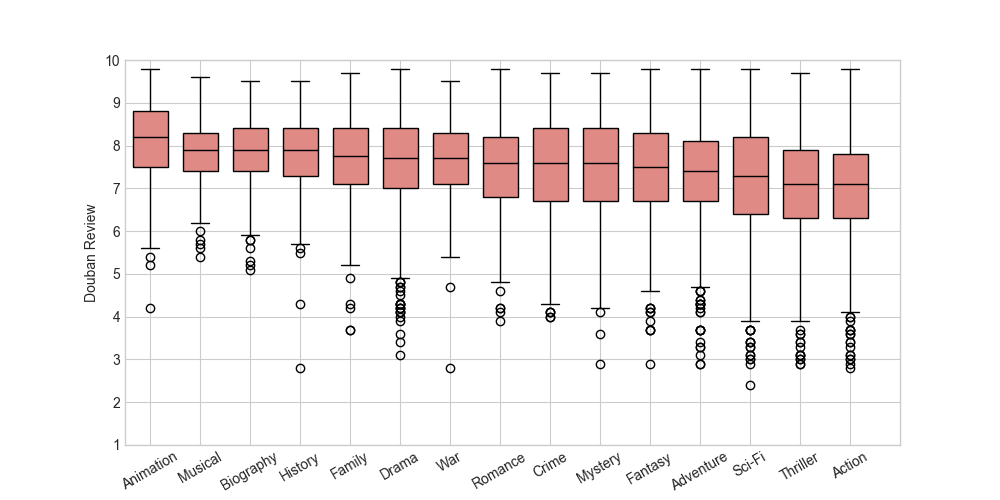

Text(0, 0.5, 'Douban Review')

In [8]:
# Top 15 genres
genre_cnt_top = genre_cnt_avg.sort_values(axis=0,ascending=False).iloc[0:15].index.tolist()

# Box plot for count 

## order by review average
genre_rw_avg = np.matmul(df['DBrating'],df[genre_cnt_top])/df[genre_cnt_top].sum(axis=0)
genre_rw_ord = genre_rw_avg.sort_values(axis=0,ascending=False).index.tolist()


plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
clr = sns.hls_palette(1, l=.7, s=.6)

box_num = len(genre_rw_ord)
ax = plt.subplot()

for i in range(box_num):
    _ = ax.boxplot(df['DBrating'][df[genre_rw_ord[i]]==True].values, positions = [i],
                          widths=0.7,patch_artist=True)
    for patch in _['boxes']:
        patch.set(facecolor=clr[0])  
    plt.setp(_['medians'], color='black')
        
ax.set_xlim(-0.5, box_num)
plt.xticks(range(box_num),genre_rw_ord,rotation=30)
plt.yticks(range(1,11))
plt.ylim(1,10)
plt.ylabel('Douban Review')

<a id="review_scat"></a>
> Code for producing scatterplot between Douban and IMDB's average *__review ratings__*. Genre can be specified to produce the scatterplot for a specific genre type. Default is for ALL genres.

<IPython.core.display.Javascript object>


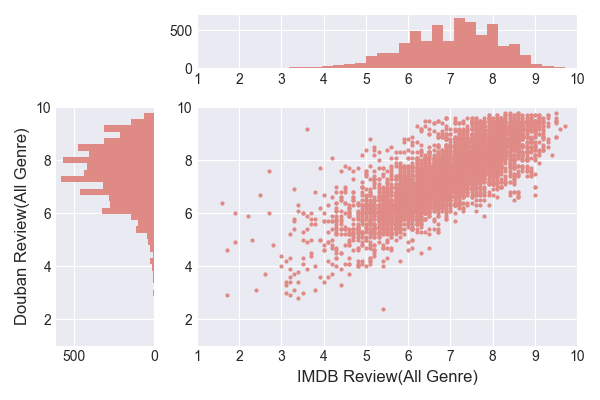

In [7]:
## Plot layout
plt.figure(figsize = (6,4))
plt.style.use('seaborn-darkgrid')
clr=sns.hls_palette(1, l=.7, s=.6) # color for each plot
gspec = gridspec.GridSpec(4,4)

top_hist = plt.subplot(gspec[0,1:])
side_hist = plt.subplot(gspec[1:,0])
lower_right = plt.subplot(gspec[1:,1:])

## Variables
genre = 'All Genre'
ind = df[genre]
IMDB_rating = df[ind]['IMDBrating']
DB_rating = df[ind]['DBrating']

lower_right.scatter(IMDB_rating,DB_rating,color=clr,s=4)
top_hist.hist(IMDB_rating,bins=31,color=clr)
side_hist.hist(DB_rating,bins=31,orientation='horizontal',color=clr)
side_hist.invert_xaxis()

for ax in [top_hist,lower_right]:
    ax.set_xlim(1,10)
for ax in [side_hist,lower_right]:
    ax.set_ylim(1,10)
lower_right.set_xlabel('IMDB Review('+ genre +')',fontsize='large')
side_hist.set_ylabel('Douban Review('+ genre +')',fontsize='large')
plt.tight_layout()